In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import skimage.color
import numpy as np
import statsmodels.api as sm

lowess = sm.nonparametric.lowess

0.19855073


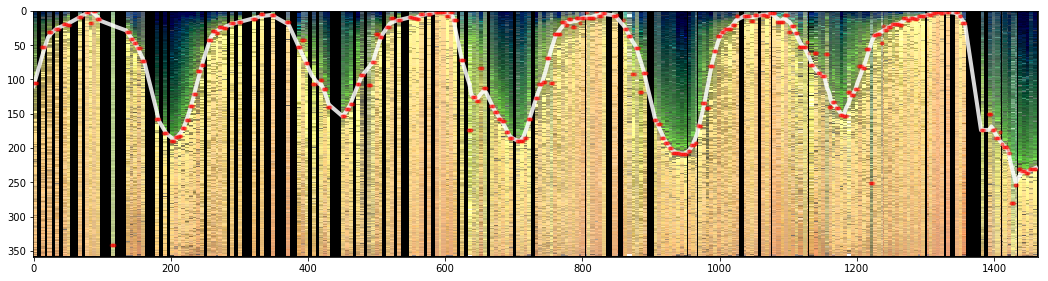

In [3]:
rgb = plt.imread('dynamics.png')
hsv = skimage.color.rgb2hsv(rgb)

# threshold and convert to time series
black_values = hsv[...,2] < 0.001

# th = 0.9
(hist, edges) = np.histogram(hsv[~black_values, 0].ravel(), bins=10)
th = edges[hist.argmax()+1]
binary = hsv[..., 0] > th 

print(th)

time_series = np.ma.masked_array(binary, black_values).sum(axis=0)

# fit using LOWESS
y = time_series[~time_series.mask]
x = np.arange(time_series.shape[0])[~time_series.mask]

ts = lowess(y, x, frac=1./50)

# plot
fig, ax = plt.subplots(figsize=(18, 8))

ax.imshow(rgb)
ax.plot(x, ts[:,1], marker='.', c='w', markersize=0, linewidth=4, alpha=0.85)
ax.plot(time_series, 'r.', alpha=0.25)

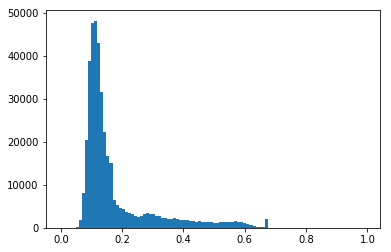

In [8]:
_ = plt.hist(hsv[~black_values, 0].ravel(), bins=100)

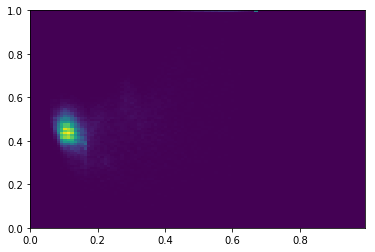

In [212]:
_ = plt.hist2d(hsv[~black_values, 0].ravel(), hsv[~black_values, 1].ravel(), bins=100)